In [1]:
import h5py
import matplotlib.pyplot as plt

In [2]:
upperlower = 'upperlower'
uList = {}
ulList = {}
for i in range(1,8):
    fu = h5py.File("save_model/upper/efficiency/efficiency_B{}.h5".format(i),'r')
    ful= h5py.File("save_model/upperlower/efficiency/efficiency_B{}.h5".format(i),'r')
    uList[i]  = {'fpr' : fu['fpr'][:], 'tpr' : fu['tpr'][:]}
    ulList[i] = {'fpr' : ful['fpr'][:],'tpr' : ful['tpr'][:]}
    fu.close()
    ful.close()

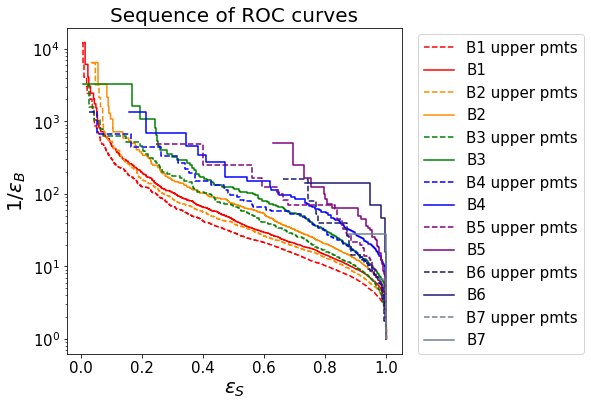

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
colors = [0, 'red', 'darkorange', 'green', 'blue', 'purple', 'midnightblue', 'slategrey']
lines = {'upper':'--','upperlower':'-'}

for i in range(1,8):
    for upperlower in lines.keys():
        x = []
        y = []
        if upperlower == 'upper':
            tpr, fpr = uList[i]['tpr'], uList[i]['fpr']
        else :
            tpr, fpr = ulList[i]['tpr'], ulList[i]['fpr']
        for t, f in zip(tpr, fpr):
            if f==0:continue
            x.append(t)
            y.append(1/f)
        if upperlower=='upper':
            ax.plot(x, y, color=colors[i], linestyle=lines[upperlower], label='B{} upper pmts'.format(i))
        else:
            ax.plot(x, y, color=colors[i], linestyle=lines[upperlower], label='B{}'.format(i))

ax.set_title('Sequence of ROC curves', fontsize=20)
ax.set_ylabel(r'$1/\epsilon_{B}$',fontsize=20)
ax.set_xlabel(r'$\epsilon_{S}$',fontsize=20)
ax.tick_params(axis='both', labelsize=15)

ax.legend(fontsize=15, loc=(1.05,0))
plt.yscale('log')
fig.savefig("../plots/{}/efficiency/sequenceROC.pdf".format(upperlower),bbox_inches='tight')
plt.show()